## 导入库

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


## 载入红酒数据

In [3]:
#载入红酒数据集
wine = load_wine()
print('wine.data.shape ', wine.data.shape, '-->178个样本, 13个特征')
print('np.unique(wine.target) ', np.unique(wine.target), '-->3分类')  

pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)], axis=1)

wine.data.shape  (178, 13) -->178个样本, 13个特征
np.unique(wine.target)  [0 1 2] -->3分类


,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


## 特征工程

## 数据集划分

In [4]:
#数据集划分
xtrain, xtest, ytrain, ytest = train_test_split(wine.data, wine.target,random_state=42)

## 机器学习算法选择 - 决策树（分类树）

### Note: 决策树（分类）算法介绍
1. 描述
    - 非参数的有监督学习算法 [https://www.cnblogs.com/wjunneng/p/9126906.html]
    - 属于分类算法
    - 优点：[https://blog.csdn.net/u010921136/article/details/90668382?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-2.channel_param&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-2.channel_param]
        - 可读性强，速度快，需要数据量不大，对缺失属性的样本不能准确预测，过拟合（可以减枝），不稳定性（随机性），
    
2. 决策树参数
    - 选择节点的方法: 信息熵(entropy)(log->慢一些), 基尼系数(gini) (两者基本等价)。衡量特征的不纯度或者信息量，纯度越高，对分类的不确定性就越低   
        - criterion
    - 每次随机抽取几个特征来计算信息熵, 所以同一个训练集可以产生不一样的树, 模型具随机性,不稳定性。 在低维度数据集不明显，在高维度随机  性明显。控制随机性的参数 4
        - random_state：如果splitter之后，有多个特征同时满足信息增益最大，则随机选取一个 
        - max_features：随机选取n个特征再进行信息增益的计算（random/best）
        - splitter（计算max_features选出来的每个特征的每个特征值作为节点的信息增益的方法，多个特征同时满足信息增益最大，则随机选取一个）：
            - 默认best（选择信息增益最大的特征值），
            - 'random' ：如果数据集不能代表全部数据，就用random，随机选特征作为节点（不严谨），严谨：max_features后的每个特征都随机选一个特征值，计算信息增益，选最大          
               
    - 过拟合相关参数：5
        - max_depth: 限制树的最大深度，在高维度低样本量非常有效， 建议从3开始尝试
        - min_samples_leaf: 分支后子节点必要有min_samples_leaf个样本，否则不分支，配合max_depth使用， 5开始尝试
        - min_samples_split: 节点必选有min_samples_split样本才可以分支
    - 对树的复杂度可以有增有减，默认None，复杂度在中间。所以要确定调参方向
        - max_features: 越小，模型越简单，泛化误差左移。越大，模型越复杂，泛化误差右移。
    
    - 修改样本标签（target）的权重，正常来说决策树会自动调整到1:1，但是对天生数据偏移到某一个目标的集 如银行违约率1:99， 可以让权重更偏向于违约类 7
        样本不均衡问题分类模型会倾向于多数的类，因为模型学习到大部分是X和Y=0之间的规律，而Y=1样本太少，导致模型对这个分类学习不足
        - class_weight: {0:1,1:10}给少量的标签（Y=1）更多的权重，模型自动调整，**尝试将少数类预测正确** ，**牺牲多数类的预测准确率，增加小数类的预测准确率**，**总体的预测准确率会下降，但是小数类的预测准确率上升**
        - min_weight_fraction_leaf：配合class_weight参数


estimator 一个属性：feature_importance_
          4个接口： fit, score, apply（样本落在哪一个节点）, predict

数据集类型
    - 擅长月亮型（排名：KNN但速度慢 > RBF向量机 > 高斯过程），
    - 线性数据（排名：朴素贝叶斯 > 神经网络 > 随机森林）
    - 不擅长环形数据 （排名：KNN > 高斯过程）
    
### 流程
1. 数据预处理 
    - 缺失值的处理
    - 对离散型特征进行编码：ordinal，onehot
    - 如极度不平衡的数据集
2. 节点划分 - 
    - 计算标签不纯度impurity： 信息熵entropy，基尼系数gini
    - 信息增益 = 父节点熵 - 所有子节点熵的和
    - **找最大信息增益作为节点**
    - 连续变量划分：所有特征值取中，计算最大信息增益做特征值分箱标准
    - CART：二叉递归划分
3. 拟合度优化，泛化误差：
    - 减枝：pruning
        - 预减枝  max_features  时间开销小，很多分支没展开
        - 后减枝  min_samples_leaf  时间开销大，保留更多分支
        - 使用验证集减枝（SSE） 人工减枝
4. 超参数学习曲线找区间
    - 交叉验证
5. 网格搜索调优


#### 实例化决策树

In [5]:
#决策树估计器
clf = DecisionTreeClassifier(criterion='gini'
                             ,random_state=42
                             #,splitter='random'
                             ,max_depth=3
                             ,min_samples_leaf=8
                             ,min_samples_split=8
                            ).fit(xtrain,ytrain)

print('y_predict: ', clf.predict(xtest))
print('y_score: ', clf.score(xtest,ytest))


y_predict:  [0 0 2 0 1 0 1 2 1 2 1 1 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 1 1 1 1 2]
y_score:  0.9333333333333333


#### 交叉验证

In [6]:
#查看不同数据集的平均预测准确率
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(criterion='gini'
                             ,random_state=42
                             #,splitter='random'
                             ,max_depth=3
                             ,min_samples_leaf=8
                             ,min_samples_split=8
                            )
scores = cross_val_score(clf,xtrain,ytrain,cv=10)
scores.mean()

0.9010989010989012

#### 特征信息量比较

In [7]:
#看看那个特征信息量比较大
#[*zip(wine.feature_names,clf.feature_importances_)]
clf = clf.fit(xtrain,ytrain)
pd.concat(  [
             pd.DataFrame(wine.feature_names, columns=['featrue_names']),
             pd.DataFrame(clf.feature_importances_,columns=['featrue_importance'])
            ]
            ,axis=1).sort_values(by='featrue_importance',ascending=False)

,featrue_names,featrue_importance
6,flavanoids,0.439744
9,color_intensity,0.426446
12,proline,0.133810
0,alcohol,0.000000
1,malic_acid,0.000000
2,ash,0.000000
3,alcalinity_of_ash,0.000000
4,magnesium,0.000000
5,total_phenols,0.000000
7,nonflavanoid_phenols,0.000000


#### 可视化树

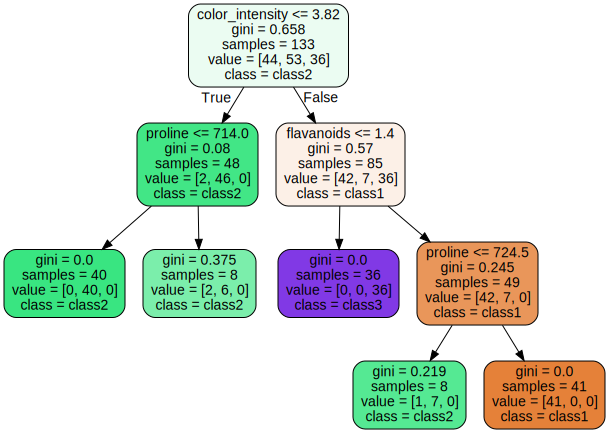

In [8]:
#可视化树
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf
                                ,feature_names=wine.feature_names
                                ,class_names=['class1','class2','class3']
                                ,filled=True
                                ,rounded=True
)

graph = graphviz.Source(dot_data)
graph

#### 模型评估

##### 调参 - 超参数学习曲线

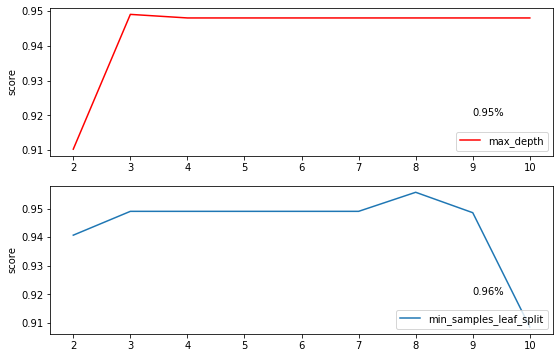

In [9]:
#调参(超参数学习曲线)
#调max_depth
plt.figure(figsize=(9,6))
scores = []
for i in range(2,11):
    clf = DecisionTreeClassifier(criterion='gini'
                                 ,random_state=42
                                 ,max_depth=i                                 
                                 )
    #clf = clf.fit(xtrain,ytrain)
    #score = clf.score(xtest,ytest)
    score = cross_val_score(clf,xtrain,ytrain,cv=10).mean()
    scores.append(score)

plt.subplot(211)
plt.plot(range(2,11),scores,color='red',label='max_depth')
plt.text(9,0.92,'{:.2f}%'.format(max(scores)))
plt.legend(loc=4)
plt.ylabel('score')

#调min_samples_leaf, min_samples_split
scores = []
for i in range(2,11):
    clf = DecisionTreeClassifier(criterion='gini'
                                 ,random_state=42
                                 ,max_depth=3
                                 ,min_samples_leaf=i
                                 ,min_samples_split=i
                                )
    #clf = clf.fit(xtrain,ytrain)
    #score = clf.score(xtest,ytest)
    score = cross_val_score(clf,xtrain,ytrain,cv=10).mean()
    scores.append(score)

plt.subplot(212)
plt.plot(range(2,11),scores,label='min_samples_leaf_split')
plt.text(9,0.92,'{:.2f}%'.format(max(scores)))
plt.legend(loc=4)
plt.ylabel('score')
plt.show()

##### 决策边界

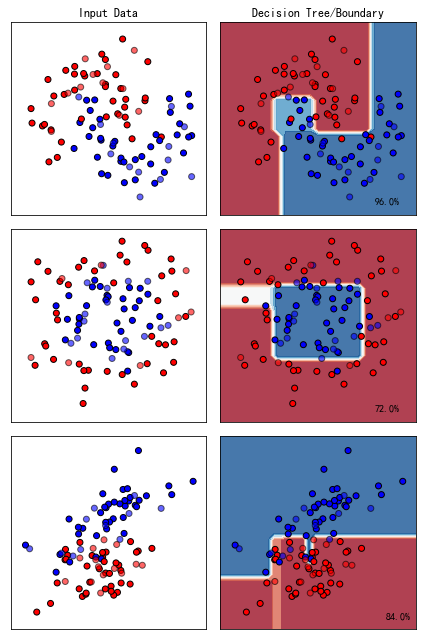

In [13]:
#决策树的决策边界 1.月亮型数据 2.环形数据 3. 二分型数据
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
#生成三种数据集
#二分型数据，100行带有两个特征，两分类
X, y = make_classification(n_samples=100  #生成100个样本
                           ,n_features=2  #2个特征-->二维数据
                           ,n_redundant=0  #添加冗余特征0个
                           ,n_informative=2  #包含信息的特征是2个
                           ,random_state=42 
                           ,n_classes=2
                           ,n_clusters_per_class=1 #每个簇内包含的标签类别有1个
                            )
#生成的二分型，两个簇彼此很远，不利于测试分类器的效果， 通过加0~1之间的随机数，让数据变得更加稀疏
rng = np.random.RandomState(42)  #生成一种随机模式
X += 2*rng.uniform(size=X.shape)  #加0~1之间的随机数
linearly_seperable = (X,y)  #打包二分型

#打包3种数据
datasets = [make_moons(noise=0.3, random_state=0)  #月亮型
           ,make_circles(noise=0.2, factor=0.5, random_state=1) #环形
           ,linearly_seperable  #二分型
           ]
labels = ['moon','circle','linearly_seperable'] #数据的labels

#画出三种数据的分布
figure = plt.figure(figsize=(6,9)) #创建画布
i=1
for ds_idx, ds in enumerate(datasets):
    X, y = ds #X特征集， y标签集
    X = StandardScaler().fit_transform(X) #标准化处理
    Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=42) #划分训练集测试集
    
    x1_min, x1_max = X[:,0].min() - 0.5 , X[:,0].max() +0.5  #生成x坐标
    x2_min, x2_max = X[:,1].min() - 0.5 , X[:,1].max() +0.5  #y坐标
    arrayx, arrayy = np.meshgrid( np.arange(x1_min, x1_max, 0.2)   #生成网格线
                                 ,np.arange(x2_min, x2_max, 0.2)
                                )
    #生成彩色画布
    #创建颜色红 蓝
    cm = plt.cm.RdBu    
    cm_bright = ListedColormap(['#FF0000','#0000FF'])  
    
    #在画布加上子图,数据是len(datasets)行，2列，放在位置i上
    ax = plt.subplot(len(datasets), 2, i)  
    
    #到此已经有0~1之间的坐标系3个了，给第一个坐标上标题
    if ds_idx ==0:
        ax.set_title('Input Data')
    
    #将数据集的分布放到我们的坐标系上
    #先放训练集
    ax.scatter(Xtrain[:,0], Xtrain[:,1]
               ,c=ytrain  #根据不同的类上颜色， 配合cmap使用     
               ,cmap=cm_bright   
               ,edgecolors='k'  #原点的边框是黑色
              )  #
    #放测试集
    ax.scatter(Xtest[:,0], Xtest[:,1]
               ,c=ytest
               ,cmap=cm_bright
               ,alpha=0.6    #测试集透明度0.6加以区分
               ,edgecolors='k'   
              )
    
    #设置坐标轴的最大值和最小值，并设定没有坐标轴
    ax.set_xlim(arrayx.min(),arrayx.max())
    ax.set_ylim(arrayy.min(),arrayy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    #每次循环改变i的取值让图每次位列不同的位置
    i += 1
    
    #数据集的画图已经完成
    ##############下面是决策树的画图################
    #训练决策树
    clf = DecisionTreeClassifier(max_depth=5
                                 ,random_state=42
                                )
    clf = clf.fit(Xtrain,ytrain) 
    score = clf.score(Xtest,ytest)   #模型预测准确率
    
    #绘制决策边界，需要给网格的每一个点()制定一种颜色
    #分类树的借口predict_proba，返回每一个数据点对应的类标签概率
    #类标签概率=数据点所在叶节点中相同类的样本数量/叶节点中的样本总数
    #由于决策树训练所用的训练集Xtrain包含两个特征，所以计算类概率的时候也必须导入结构相同的数组，即两个特征
    #ravel() 将数组降至1维
    #np.c_[] 将两个矩阵左右合并  (np.r_[]上下合并)
    grid_pionts = np.c_[arrayx.ravel(),arrayy.ravel()] #网格的所有数据点的坐标（特征）
    Z = clf.predict_proba(grid_pionts)[:,1] #得到每一个数据点的类概率
    
    #将返回的类概率当数据放到contourf里面绘制轮廓
    Z = Z.reshape(arrayx.shape)
    ax = plt.subplot(len(datasets), 2, i) 
    ax.contourf(arrayx
               ,arrayy
               ,Z
               ,cmap=cm
               ,alpha=0.8)
    #放训练集
    ax.scatter(Xtrain[:,0],Xtrain[:,1]
               ,c=ytrain,cmap=cm_bright,edgecolors='k')
    #测试集
    ax.scatter(Xtest[:,0],Xtest[:,1]
               ,c=ytest,cmap=cm_bright,edgecolors='k',alpha=0.6)
    ax.set_xlim(arrayx.min(),arrayx.max())
    ax.set_ylim(arrayy.min(),arrayy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    #加上标题
    if ds_idx==0:
        ax.set_title('Decision Tree/Boundary')
        
    #右下角显示概率
    ax.text(arrayx.max()-1, arrayy.min()+0.3, ('{:.1f}%'.format(score*100)))
        
    #位置+1    
    i += 1
    
plt.tight_layout()
plt.show()

### 不平衡的数据，深入理解权重class_weight，混淆矩阵
- 准确度 总体的accuracy
- 精确度 precision
- 召回率 recall 少数类的准确度

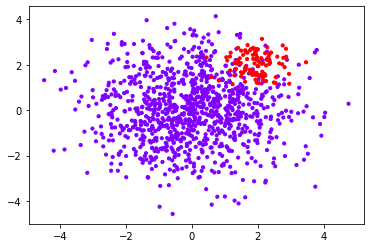

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

class_1 = 1000 #类别1有1000个样本
class_2 = 100 #类别2只有100个
centers = [[0,0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [1.5, 0.5] #设定两个类别的方差，通常来说，样本量比较大的类别会更加松散
X, Y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

#看看数据集长什么样
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="rainbow",s=10);
#其中红色点是少数类，紫色点是多数类

In [12]:
# 原始的决策树，不做平衡
model = DecisionTreeClassifier(max_depth=4)
model.fit(X,Y)
print('不做平衡的准确度: {}'.format(model.score(X,Y)))
# 手动计算多数类的准确度 Y=0
Y_pred = model.predict(X)  #预测标签
print('多数类的准确度: {}'.format(((Y == 0) & (Y_pred == 0)).sum() / (Y==0).sum())) 
# 手动计算少数类的准确度 Y=1  recall
print('少数类的准确度: {}'.format(((Y == 1) & (Y_pred == 1)).sum() / (Y==1).sum()))

不做平衡的准确度: 0.9763636363636363
多数类的准确度: 0.984
少数类的准确度: 0.9


In [13]:
# 新的决策树，做平衡
model = DecisionTreeClassifier(max_depth=4,class_weight={0:1,1:10})
model.fit(X,Y)
print('做平衡的准确度: {}'.format(model.score(X,Y)))
# 手动计算多数类的准确度 Y=0
Y_pred = model.predict(X)  #预测标签
print('多数类的准确度: {}'.format(((Y == 0) & (Y_pred == 0)).sum() / (Y==0).sum())) 
# 手动计算少数类的准确度 Y=1  recall
print('少数类的准确度: {}'.format(((Y == 1) & (Y_pred == 1)).sum() / (Y==1).sum()))

做平衡的准确度: 0.9681818181818181
多数类的准确度: 0.966
少数类的准确度: 0.99


In [14]:
# 如何借助sklearn的包来计算f1,召回率与查准率，ROC——AUC值
from sklearn.metrics import accuracy_score,recall_score, precision_score,f1_score,roc_auc_score
# 首先要预测出标签出来
Y_pred = model.predict(X)  #预测标签
# 将真实标签和预测标签放进去
accuracy_score(Y,Y_pred)  #相当于model.score
recall_score(Y,Y_pred)
precision_score(Y,Y_pred)
f1_score(Y,Y_pred)
roc_auc_score(Y,Y_pred) ## 重点：二分类问题中 最最最好的评估指标


0.978

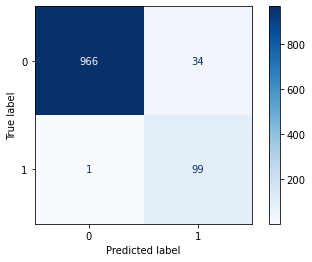

In [32]:
# 混淆矩阵
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(model,X,Y,labels=[0,1],cmap=plt.cm.Blues)

In [37]:
# 网格搜索
from sklearn.model_selection import GridSearchCV

param = {
        'max_depth' : [4,5,6],
        'min_samples_leaf' : [6,7,8],
        'min_impurity_decrease' : [0,0.005]
}

clf = DecisionTreeClassifier(random_state=42)

gs = GridSearchCV(clf,param,cv=5,n_jobs=-1)
gs.fit(X,Y)
gs.best_score_,gs.best_estimator_

(0.96,
 DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0, min_samples_leaf=7,
                        random_state=42))

## 机器算法选择 - 随机森林

### Note： 集成算法与随机森林 (分类)
1. 概述
    1. **集成算法(ensembling learning)**
        - 集成算法本身不是一个单独的机器学习算法，而是通过在数据上建立多个单独的模型，集成汇总所有模型的建模结果。 效果非常好，应用非常广泛。如`随机森林，梯度提升树（GBDT），Xgboost等`。
        - 由多个模型集成的模型叫集成模型（ensemble estimator），其中的每一个模型都叫基评估器（base estimator）
        - 集成算法分为三类：`bagging（袋装法），提升法（boosting），stacking`
            - bagging：各基评估器相互独立，然后对其预测进行平均或者多数表决原则来决定最后的结果，`并且准确率要大于50%。`使用代表：随机森林
                
                - 假设一棵树的错误率是$\varepsilon=0.2$，集成25棵树，则至少13棵树出错才判错：
                  $$多数表决\varepsilon _{random forest} = \sum_{i=13}^{25}\binom{i}{25}\varepsilon ^{i}\left ( 1 - \varepsilon  \right )^{25-i} =0.000369$$
            - boosting：模型按顺序一一构建，核心思想是结合弱评估器的力量一次次对难以评估的样本进行预测，从而构成一个强评估器。代表Adaboost，梯度提升树 [https://www.bilibili.com/video/BV14t41127Vx] 6:00
        
    2. **随机森林**
        - 集成算法，袋装法 
        - 基评估器越准，集成评估器也越准
        - 优点：
        - 可读性强，速度快，需要数据量不大，对缺失属性的样本不能准确预测，过拟合（可以减枝），不稳定性（随机性），

2. 随机森林参数
    - 和分类树基本相同   
        - criterion, max_depth, min_samples_leaf/split等
    - 基评估器的个数： `通常越大越好，但是计算成本越高`
        - n_estimators：通常0~200之间
    - 随机种子：`控制的是一片森林的随机性，而不是一棵树的随机性。避免了森林里的树都一样，也就是说所有树判断结果都一样，这样集成算法的结果就无法超越单个树的准确率了。`
        - random_state （固定一片树的random_state，每棵树的random_state事不一样的）
        （可以使用集成的属性rdf.estimators_查看每一科树的随机种子random_state）
    - 从上面可以知道，森林具有随机性（每一棵树的随机种子不一样），`通常随机性越大，集成效果越好`，random_state是一个方法，另一个最直接的方法就是用不同的训练集-->boostrap & oob_score [https://www.bilibili.com/video/BV14t41127Vx?p=3] 15:00
        - boostrap: 有放回的随机抽样，从原始训练集抽样形成不同的训练集（自助集）,一般来说自助集大约平均包含63%的原始训练集的样本，约有37%的训练样本被浪费掉（out_of_bag袋外数据）-->oob_score
            $$1-(1-\frac{1}{n})^{n}\approx 0.63\: \: \: \: \: if\: \: n \to \infty $$
        - oob_score = True
3. 随机森林的重要接口
    - rdf.estimators_[0].random_state：查看森林中的`某一棵树`及`其参数`等
        - <code> [tree.feature_importances_ for tree in RFC.estimators_] </code>
    - rdf.feature_importances_:提取每一棵树的每一个特征的feature_importances_提取出来并求平均.mean()
        - <code> [tree.predict_proba(Xtest) for tree in RFC.estimators_] </code>
        - <code> np.array([tree.predict_proba(Xtest) for tree in RFC.estimators_]).mean(axis=0) </code>
    - rdf.oob_score_：使用`袋外数据`在当测试集并计算得分

    - rdf.predict_proba:输出每一个样本在各个类别下的概率值（投票结果？）

### 导入库，数据集

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
wine = load_wine()

### 数据集划分

In [3]:
xtrain, xtest, ytrain, ytest = train_test_split(wine.data,wine.target,random_state=42,test_size=0.3)

### 实例化

In [4]:
#xtrain, xtest, ytrain, ytest = train_test_split(wine.data,wine.target,test_size=0.3)
#实例化分类树
clf = DecisionTreeClassifier(criterion='gini'
                             ,random_state=42
                             #,spliter='random'
                             ,max_depth=3
                             ,min_samples_leaf=2
                             ,min_samples_split=2
                            )
clf = clf.fit(xtrain, ytrain)
clf_score = clf.score(xtest,ytest)

#实例化随机森林
rdf = RandomForestClassifier(n_estimators = 100
                             ,criterion='gini'
                             ,random_state=42
                             #,spliter='random'
                             ,max_depth=3
                             ,min_samples_leaf=2
                             ,min_samples_split=2
                            )
rdf = rdf.fit(xtrain,ytrain)
rdf_score = rdf.score(xtest,ytest)

#查看预测结果
print('clf score = {:.5f}%'.format(clf_score*100))
print('rdf score = {:.5f}%'.format(rdf_score*100))

clf score = 98.14815%
rdf score = 98.14815%


#### 查看每一棵树的状况

In [5]:
for i in range(len(rdf.estimators_)):
    print(rdf.estimators_[i].random_state)  #查看每一棵树的随机种子


1608637542
1273642419
1935803228
787846414
996406378
1201263687
423734972
415968276
670094950
1914837113
669991378
429389014
249467210
1972458954
1572714583
1433267572
434285667
613608295
893664919
648061058
88409749
242285876
2018247425
953477463
1427830251
1883569565
911989541
3344769
780932287
2114032571
787716372
504579232
1306710475
479546681
106328085
30349564
1855189739
99052376
1250819632
106406362
480404538
1717389822
599121577
200427519
1254751707
2034764475
1573512143
999745294
1958805693
389151677
1224821422
508464061
857592370
1642661739
61136438
2075460851
396917567
2004731384
199502978
1545932260
461901618
774414982
732395540
1934879560
279394470
56972561
1927948675
1899242072
1999874363
271820813
1324556529
1655351289
1308306184
68574553
419498548
991681409
791274835
1035196507
1890440558
787110843
524150214
472432043
2126768636
1431061255
147697582
744595490
1758017741
1679592528
1111451555
782698033
698027879
1096768899
1338788865
1826030589
86191493
893102645
2006191

### 交叉验证 + 超参数（superpa）

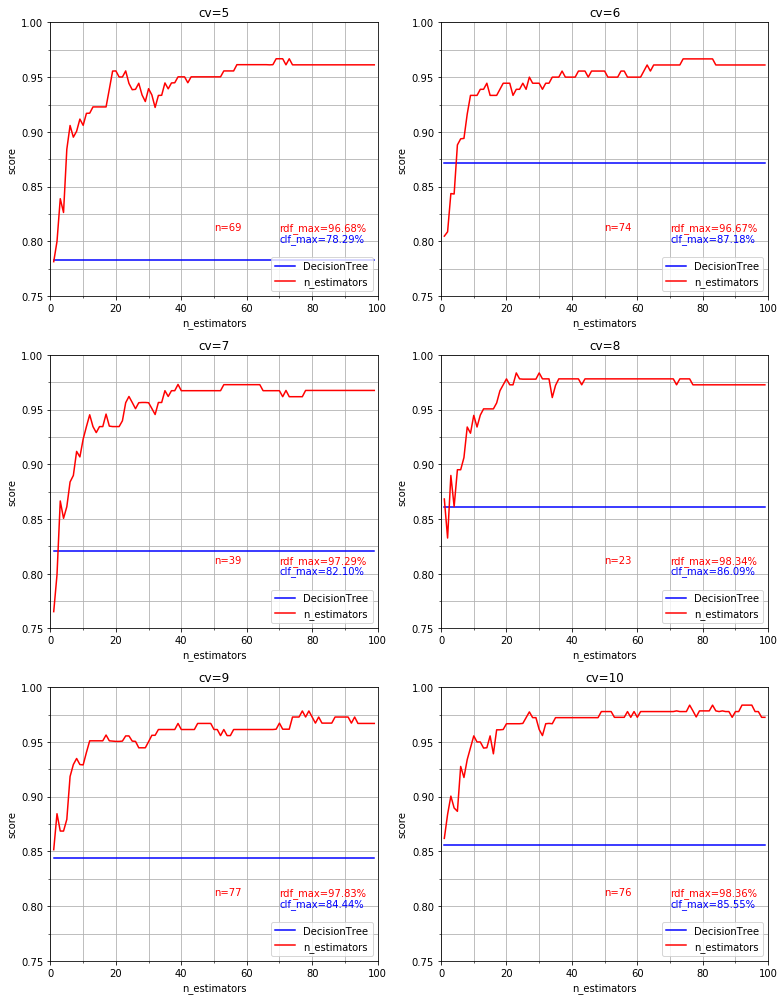

In [6]:
#####Time Warning: ~1.5min
import numpy as np
from sklearn.model_selection import cross_val_score

#交叉验证可以直接使用完整的数据集
x = wine.data
y = wine.target

clf = DecisionTreeClassifier(criterion='gini'
                            ,random_state=42
                            ,max_depth=3
                            ,min_samples_leaf=8
                            ,min_samples_split=8
                            )

fig, ax = plt.subplots(3,2,figsize=(11,14),squeeze=True)
cv = [5,6,7,8,9,10]
loc = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1)]
for loc,cv in zip(loc,cv): #loc是子图的位置
                                                      #cv是交叉验证的cv
    scores_clf = []  #决策树的得分列表
    scores_rdf = []  #随机森林的得分列表
    xaxis = range(1,100)  #x轴 或 n_estimators=1~99
    for i in xaxis:
        #clf的交叉验证
        mean_score_clf = cross_val_score(clf,x,y,cv=cv,n_jobs=-1).mean()
        scores_clf.append(mean_score_clf)

        #随机森林交叉验证+超参数曲线n_estimator
        rdf = RandomForestClassifier(n_estimators=i
                                    ,criterion='gini'
                                    ,random_state=42
                                    ,max_depth=3
                                    ,min_samples_leaf=8
                                    ,min_samples_split=8)

        mean_score_rdf = cross_val_score(rdf,x,y,cv=cv,n_jobs=-1).mean()
        scores_rdf.append(mean_score_rdf)

    #画图
    ax[loc].set_title('cv={}'.format(cv))
    ax[loc].plot(xaxis,scores_clf,label='DecisionTree',color='blue')
    ax[loc].plot(xaxis,scores_rdf,label='n_estimators',color='r')
    ax[loc].set_xlim(0,100)
    ax[loc].set_ylim(0.75,1)
    ax[loc].set_xticks(ticks=list(range(0,110,10)),minor=True)
    ax[loc].set_yticks(ticks=np.arange(0.75,1.025,0.025),minor=True)
    ax[loc].text(70,0.80,'clf_max={:.2f}%'.format(max(scores_clf)*100),color='blue')
    ax[loc].text(70,0.81,'rdf_max={:.2f}%'.format(max(scores_rdf)*100),color='r')
    ax[loc].text(50,0.81,'n={}'.format(scores_rdf.index(max(scores_rdf))+1),color='r')
    ax[loc].grid(which='both')
    ax[loc].set_xlabel('n_estimators')
    ax[loc].set_ylabel('score')
    ax[loc].legend(loc=4)
    plt.grid(which='both')
plt.tight_layout()
plt.show()

### 结合以上调参结果，使用oob测试模型

In [7]:
rdf = RandomForestClassifier(n_estimators=76
                            ,criterion='gini'
                            ,random_state=42
                            ,max_depth=3
                            ,min_samples_leaf=8
                            ,min_samples_split=8
                            ,oob_score=True
                            )
rdf = rdf.fit(wine.data,wine.target)
rdf.oob_score_

0.9831460674157303

## 深入调参详解（乳腺癌数据）

### Note：
对于分类算法，调参的思路：提升分类的准确率如*score，oobscore*-->准确率受什么因素影响？-->模型准确率的**相关指标**

- **确定目标** --泛化误差最低
    1. 泛化误差（generalization error）/偏差-方差困境：`衡量模型在未知数据上的准确率`的指标
        - 模型泛化误差大，说明模型在未知数据上，表现糟糕，泛化程度不够
        - 泛化误差受模型的**复杂度**影响，如下图
        - 模型越简单，对数据学习不足-->欠拟合。模型越复杂，对数据学习的越具体-->过拟合。
        - **`调参之前先确定模型在图像的左还是右边，进而进行下一步的增加复杂度和减少复杂度`**
    
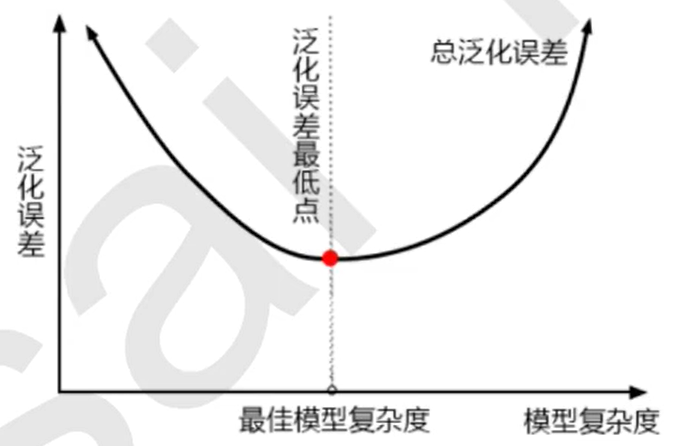
    
- **调参方法**

    1. 经验

    2. 学习曲线

    3. 网格搜索（grid_search）
   


